# Quick, Draw! Project

## Load Data

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Folder containing the .npy files
DATA_FOLDER = "./data"

# Folder where processed data will be saved
OUTPUT_FOLDER = "./processed_data"

# Ensure the output folder exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

def load_and_prepare_data(data_folder):
    data = []
    labels = []
    class_names = []
    
    # Loop through all .npy files in the folder
    for idx, file_name in enumerate(os.listdir(data_folder)):
        if file_name.endswith(".npy"):
            file_path = os.path.join(data_folder, file_name)
            print(f"Loading data from {file_name}...")
            
            # Load the data
            category_data = np.load(file_path)
            
            # Reshape to (28, 28, 1) and normalize
            category_data = category_data.reshape(-1, 28, 28, 1) / 255.0
            
            # Append data and labels
            data.append(category_data)
            labels.extend([idx] * category_data.shape[0])
            
            # Store class name (filename without extension)
            class_names.append(file_name.split(".")[0])
    
    # Combine all data and labels into arrays
    data = np.vstack(data)
    labels = np.array(labels)
    
    print(f"Loaded {len(class_names)} classes with {data.shape[0]} total samples.")
    return data, labels, class_names

def split_data(data, labels, test_size=0.2):
    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=test_size, random_state=42)
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}")
    return X_train, X_val, y_train, y_val


# Load and prepare data
data, labels, class_names = load_and_prepare_data(DATA_FOLDER)

# Split the data
X_train, X_val, y_train, y_val = split_data(data, labels)

# Save class names
class_names_path = os.path.join(OUTPUT_FOLDER, "class_names.npy")
np.save(class_names_path, class_names)
print(f"Class names saved to {class_names_path}")

# Optional: Save the splits
np.save(os.path.join(OUTPUT_FOLDER, "X_train.npy"), X_train)
np.save(os.path.join(OUTPUT_FOLDER, "X_val.npy"), X_val)
np.save(os.path.join(OUTPUT_FOLDER, "y_train.npy"), y_train)
np.save(os.path.join(OUTPUT_FOLDER, "y_val.npy"), y_val)
print(f"Data splits saved to {OUTPUT_FOLDER}.")

Loading data from airplane.npy...
Loading data from hot_air_balloon.npy...
Loading data from ice_cream.npy...
Loading data from flower.npy...
Loading data from pizza.npy...
Loading data from bicycle.npy...
Loading data from star.npy...
Loading data from camera.npy...
Loading data from dog.npy...
Loading data from radio.npy...
Loading data from envelope.npy...
Loading data from lighthouse.npy...
Loading data from mailbox.npy...
Loading data from windmill.npy...
Loaded 14 classes with 1903563 total samples.
Training data: (1522850, 28, 28, 1), Validation data: (380713, 28, 28, 1)
Class names saved to ./processed_data/class_names.npy
Data splits saved to ./processed_data.


## Build & Train Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load preprocessed data
OUTPUT_FOLDER = "./processed_data"

X_train = np.load(f"{OUTPUT_FOLDER}/X_train.npy")
X_val = np.load(f"{OUTPUT_FOLDER}/X_val.npy")
y_train = np.load(f"{OUTPUT_FOLDER}/y_train.npy")
y_val = np.load(f"{OUTPUT_FOLDER}/y_val.npy")

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (5, 5), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
        Conv2D(64, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(num_classes, activation='softmax'),
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Model Parameters
input_shape = (28, 28, 1)  # Based on data preprocessing
num_classes = len(np.load(f"{OUTPUT_FOLDER}/class_names.npy"))  # Number of classes

# Create and compile the model
model = create_cnn_model(input_shape, num_classes)

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,  # Adjust epochs based on your needs
    batch_size=64,  # Adjust batch size based on your hardware
    verbose=1
)

# Save the trained model
model.save(f"{OUTPUT_FOLDER}/cnn_model.h5")
print("Model saved to disk.")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,366 (2.46 MB)

 Trainable params: 644,366 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
23795/23795 ━━━━━━━━━━━━━━━━━━━━ 445s 19ms/step - accuracy: 0.8575 - loss: 0.4876 - val_accuracy: 0.9428 - val_loss: 0.2016
Epoch 2/3
23795/23795 ━━━━━━━━━━━━━━━━━━━━ 421s 18ms/step - accuracy: 0.9318 - loss: 0.2525 - val_accuracy: 0.9453 - val_loss: 0.1922
Epoch 3/3
23795/23795 ━━━━━━━━━━━━━━━━━━━━ 670s 28ms/step - accuracy: 0.9373 - loss: 0.2342 - val_accuracy: 0.9462 - val_loss: 0.1890


Model saved to disk.


## Visualize Training

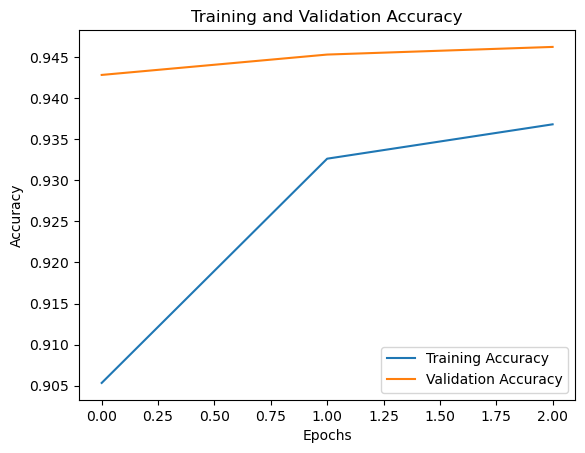

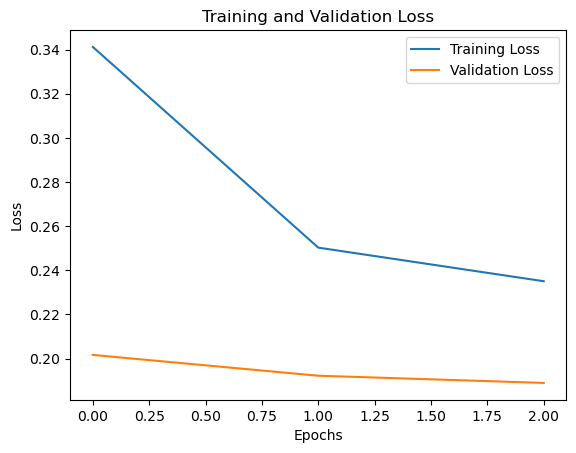

In [6]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    # Accuracy plot
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss plot
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Visualize the training history
plot_training_history(history)

## Evaluate Model

Validation Loss: 0.1890
Validation Accuracy: 0.9462
11898/11898 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


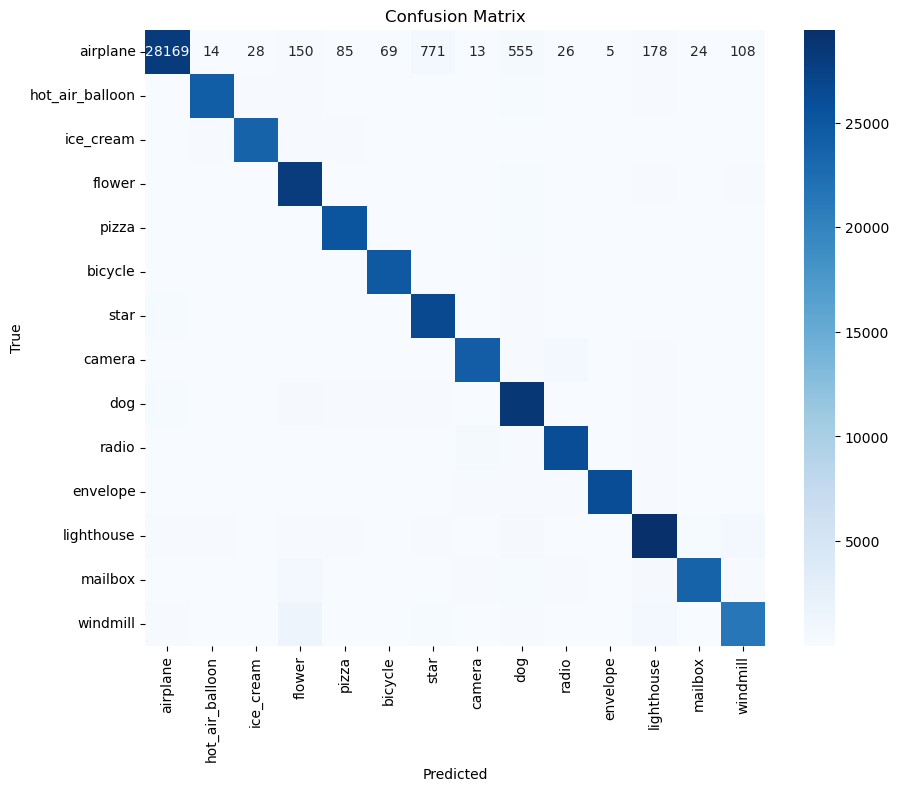

Classification Report:
                 precision    recall  f1-score   support

       airplane       0.95      0.93      0.94     30195
hot_air_balloon       0.97      0.96      0.97     25164
      ice_cream       0.97      0.96      0.97     24585
         flower       0.89      0.96      0.93     29090
          pizza       0.95      0.97      0.96     26042
        bicycle       0.97      0.98      0.98     25299
           star       0.94      0.97      0.95     27514
         camera       0.96      0.94      0.95     25748
            dog       0.90      0.94      0.92     30289
          radio       0.95      0.95      0.95     27436
       envelope       0.99      0.96      0.98     27163
     lighthouse       0.93      0.92      0.92     32035
        mailbox       0.97      0.91      0.94     25861
       windmill       0.93      0.88      0.90     24292

       accuracy                           0.95    380713
      macro avg       0.95      0.95      0.95    380713
   wei

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict labels for validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Load class names
class_names = np.load(f"{OUTPUT_FOLDER}/class_names.npy", allow_pickle=True)

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, target_names=class_names))

## Quick, Draw!

In [11]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageDraw, ImageOps
import tensorflow as tf

# Load the trained model and class names
OUTPUT_FOLDER = "./processed_data"
model = load_model(f"{OUTPUT_FOLDER}/cnn_model.h5")
class_names = np.load(f"{OUTPUT_FOLDER}/class_names.npy", allow_pickle=True)

# Canvas size (larger than model input size for ease of drawing)
CANVAS_SIZE = 400
MODEL_INPUT_SIZE = 28

# Preprocess the canvas for prediction
def preprocess_image(image):
    # Resize the image to match the model's input size
    resized = image.resize((MODEL_INPUT_SIZE, MODEL_INPUT_SIZE))
    # Convert to grayscale and normalize pixel values
    grayscale = ImageOps.grayscale(resized)
    normalized = np.array(grayscale) / 255.0
    # Reshape to match model input (1, 28, 28, 1)
    reshaped = normalized.reshape(1, MODEL_INPUT_SIZE, MODEL_INPUT_SIZE, 1)
    return tf.convert_to_tensor(reshaped, dtype=tf.float32)


# Predict the class of the drawing
def predict():
    # Check if the canvas has any drawn content
    if np.all(np.array(drawing_image) == 255):  # All white
        messagebox.showwarning("Empty Canvas", "Please draw something on the canvas.")
        return

    processed = preprocess_image(drawing_image)
    prediction = model.predict(processed)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Show prediction result
    messagebox.showinfo("Prediction", f"Class: {predicted_class}\nConfidence: {confidence:.2f}")

# Clear the canvas and reset the drawing image
def clear_canvas():
    canvas.delete("all")
    drawing_image.paste(255, (0, 0, CANVAS_SIZE, CANVAS_SIZE))  # Reset to a white image

# Draw on the canvas
def paint(event):
    x, y = event.x, event.y
    r = 4  # Brush radius
    canvas.create_oval(x-r, y-r, x+r, y+r, fill="black", outline="black")
    draw.ellipse([x-r, y-r, x+r, y+r], fill="black")

# Set up the main application window
root = tk.Tk()
root.title("Handwriting Prediction")

# Create a canvas for drawing
canvas = tk.Canvas(root, width=CANVAS_SIZE, height=CANVAS_SIZE, bg="white")
canvas.pack()

# PIL Image for drawing
drawing_image = Image.new("L", (CANVAS_SIZE, CANVAS_SIZE), color=255)  # White background
draw = ImageDraw.Draw(drawing_image)

# Add buttons for prediction and clearing the canvas
button_frame = tk.Frame(root)
button_frame.pack()

predict_button = tk.Button(button_frame, text="Predict", command=predict)
predict_button.pack(side="left", padx=10, pady=10)

clear_button = tk.Button(button_frame, text="Clear", command=clear_canvas)
clear_button.pack(side="left", padx=10, pady=10)

# Bind mouse events for drawing
canvas.bind("<B1-Motion>", paint)

# Start the Tkinter event loop
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
